# Task 20: Feature Engineering

Feature engineering is the process of creating new features or modifying existing ones from your raw data to improve the performance of a machine learning model.

In simpler terms, it's like preparing ingredients before cooking a meal. As in feature engineering, you transform your data in ways that help the model understand it better and make more accurate predictions.

## Importing Libraries:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

- **mutual_info_regression** calculates the mutual information between each feature of X and the target variable Y independent of the remaining features of X.

### Loading the Dataset 1:

In [2]:
imdb_data = pd.read_csv("imdb_data.csv")

#### About Dataset:

Dataset containing information about movies which appears on IMDB website.
<br>
Dataset contains 3348 observations described by 12 attributes.

In [26]:
# total no. of rows and columns
imdb_data.shape

(3348, 12)

In [27]:
# about columns information
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 235.5+ KB


##### Handling Missing Values:

In [12]:
# check for missing values
print(imdb_data.isna().sum())

id                 0
primaryTitle       0
originalTitle      0
isAdult            0
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
budget             0
gross             51
release_date       5
directors          0
dtype: int64


In [3]:
# fill the missing values of 'gross' with their mean

imdb_data['gross'] = imdb_data['gross'].fillna(imdb_data['gross'].mean())

# after imputing, check missing values
print("Missing values after imputed:")
print(imdb_data.isna().sum())

Missing values after imputed:
id                0
primaryTitle      0
originalTitle     0
isAdult           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
budget            0
gross             0
release_date      5
directors         0
dtype: int64


In [4]:
# fill missing values of 'release_date' with the most frequent value (mode)
imdb_data['release_date'] = imdb_data['release_date'].fillna(imdb_data['release_date'].mode()[0])

# after imputing, check missing values
print("Missing values after imputation:")
print(imdb_data.isna().sum())

Missing values after imputation:
id                0
primaryTitle      0
originalTitle     0
isAdult           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
budget            0
gross             0
release_date      0
directors         0
dtype: int64


In [16]:
# summary statistics
imdb_data.describe()

,isAdult,runtimeMinutes,averageRating,numVotes,budget,gross
count,3348.0,3348.000000,3348.00000,3.348000e+03,3.348000e+03,3.348000e+03
mean,0.0,112.739845,6.73853,2.155492e+05,5.039280e+07,1.681599e+08
std,0.0,19.927703,0.88221,2.480211e+05,5.178614e+07,2.348408e+08
min,0.0,63.000000,1.00000,5.000400e+04,1.800000e+01,2.100000e+02
25%,0.0,98.000000,6.20000,7.897700e+04,1.500000e+07,3.726425e+07
50%,0.0,109.000000,6.80000,1.290400e+05,3.200000e+07,9.098894e+07
75%,0.0,124.000000,7.30000,2.468495e+05,6.800000e+07,1.977018e+08
max,0.0,242.000000,9.30000,2.817283e+06,3.560000e+08,2.923706e+09


In [17]:
# look out first few rows
imdb_data.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


## 1. Feature Selection:

For feature selection you can use one of the following method,
- Mutual Information
- Chi Square Test

For Feature Seelction, I used Mutual Information method.

##### Correlation Analysis:

In [25]:
# select numeric features
num_featrs = ['runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'gross']

# compute correlation matrix
correlation_matrix = imdb_data[num_featrs].corr()
correlation_matrix

,runtimeMinutes,averageRating,numVotes,budget,gross
runtimeMinutes,1.000000,0.359969,0.333702,0.309109,0.250383
averageRating,0.359969,1.000000,0.484695,-0.079510,0.126851
numVotes,0.333702,0.484695,1.000000,0.306588,0.520552
budget,0.309109,-0.079510,0.306588,1.000000,0.692817
gross,0.250383,0.126851,0.520552,0.692817,1.000000


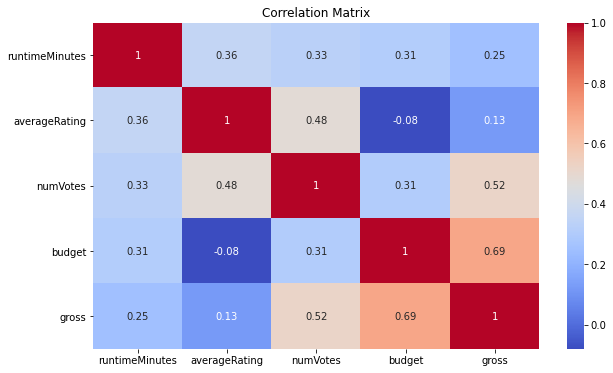

In [19]:
# plotting
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Computation of Mutual Information:

**Mutual Information** Measures the amount of information obtained about one variable through another variable. In feature selection, it tells us how much knowing a feature reduces uncertainty about the target variable.

In [26]:
# compute mutual information with target (averageRating)
X = imdb_data[num_featrs].values
y = imdb_data['averageRating'].values
mi_scores = mutual_info_regression(X, y)

print("Mutual Information Scores:\n")
for i, feature in enumerate(num_featrs):
    print(f"{feature}: {mi_scores[i]}")

Mutual Information Scores:

runtimeMinutes: 0.056624835203852975
averageRating: 3.5544455716871743
numVotes: 0.20024024966552556
budget: 0.035623624115525665
gross: 0.04001045095503741


##### Select features based on correlation and mutual information:

In [32]:
# threshold for correlation (absolute value) and mutual information scores
selected_featrs = [feature for feature in num_featrs if abs(correlation_matrix.loc['averageRating', feature]) > 0.1 or mi_scores[num_featrs.index(feature)] > 0.1]

print("Selected Features:\n", selected_featrs)

Selected Features:
 ['runtimeMinutes', 'averageRating', 'numVotes', 'gross']


I select features with high absolute correlation coefficients or mutual information scores above a specified threshold which is (0.1).

In [33]:
print("Explanation of Selected Features:\n")
for feature in selected_featrs:
    if feature in num_featrs:
        if abs(correlation_matrix.loc['averageRating', feature]) > 0.1:
            print(f"{feature} - Selected due to high correlation with 'averageRating'.")
        elif mi_scores[num_featrs.index(feature)] > 0.1:
            print(f"{feature} - Selected due to high mutual information with 'averageRating'.")
    else:
        print(f"{feature} - Categorical or non-numeric feature, not selected based on correlation or mutual information.")

Explanation of Selected Features:

runtimeMinutes - Selected due to high correlation with 'averageRating'.
averageRating - Selected due to high correlation with 'averageRating'.
numVotes - Selected due to high correlation with 'averageRating'.
gross - Selected due to high correlation with 'averageRating'.


## 2. Feature Transformation:

In [9]:
# importing libraries for this task
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
num_featrs = ['runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'gross']
X = imdb_data[num_featrs].values
y = imdb_data['averageRating'].values

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize linear regression model
model = LinearRegression()

# fit and evaluate the model before apply transformation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
mse_before = mean_squared_error(y_test, y_pred)
print(f'MSE before transformations: {mse_before}')

MSE before transformations: 4.215655667060514e-16


##### Apply log Transformation:
- Then, Standardize the features
- Lastly, fit and evaluate

In [48]:
log_transformer = FunctionTransformer(np.log1p, validate=True)
X_train_log = log_transformer.transform(X_train)
X_test_log = log_transformer.transform(X_test)

# replace original columns with transformed columns
X_train = X_train_log
X_test = X_test_log

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit and evaluate the model after transformations
model.fit(X_train_scaled, y_train)
y_pred_transformed = model.predict(X_test_scaled)
mse_after = mean_squared_error(y_test, y_pred_transformed)
print(f'MSE after transformations: {mse_after}')

MSE after transformations: 0.025013734282782953


In [49]:
# documenting
transformations = {
    'Log Transformation': ['numVotes', 'budget', 'gross'],
    'Standardization': ['runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'gross']
}

print('Transformations applied:')
print(transformations)
print(f'Impact on model performance:')
print(f'MSE before transformations: {mse_before}')
print(f'MSE after transformations: {mse_after}')

Transformations applied:
{'Log Transformation': ['numVotes', 'budget', 'gross'], 'Standardization': ['runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'gross']}
Impact on model performance:
MSE before transformations: 5.143080145287927e-16
MSE after transformations: 0.025013734282782953


- MSE value before transformation close to zero typically indicate a very good fit (almost perfect predictions).
- The small positive MSE after transformations, it shows that the transformations might had a slight impact on model performance.

## 3. Feature Creation:

In [18]:
# age of the movie
imdb_data['release_date'] = pd.to_datetime(imdb_data['release_date'])
imdb_data['age_of_movie'] = 2024 - imdb_data['release_date'].dt.year
imdb_data

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,age_of_movie
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,2001-12-11,James Mangold,23
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,1970-12-11,Wolfgang Reitherman,54
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1970-01-01,Brian G. Hutton,54
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1970-01-25,Robert Altman,54
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,1970-02-04,Franklin J. Schaffner,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,2020-09-11,Chloé Zhao,4
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,2021-06-30,Chris McKay,3
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,2021-02-01,Shaka King,3
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,2021-07-01,Adam Robitel,3


In [19]:
# profit column
imdb_data['profit'] = imdb_data['gross'] - imdb_data['budget']

# director's avg. rating from prev. movies
director_avg_rating = imdb_data.groupby('directors')['averageRating'].transform('mean')
imdb_data['director_avg_rating'] = director_avg_rating

# genre count
imdb_data['genre_count'] = imdb_data['genres'].apply(lambda x: len(x.split(',')))
imdb_data

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,age_of_movie,profit,director_avg_rating,genre_count
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,2001-12-11,James Mangold,23,28019048.0,7.209091,3
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,1970-12-11,Wolfgang Reitherman,54,31459543.0,7.100000,3
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1970-01-01,Brian G. Hutton,54,1200000.0,7.600000,3
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1970-01-25,Robert Altman,54,78100000.0,7.366667,3
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,1970-02-04,Franklin J. Schaffner,54,49749765.0,7.950000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,2020-09-11,Chloé Zhao,4,34458207.0,6.800000,1
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,2021-06-30,Chris McKay,3,-185600000.0,6.766667,3
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,2021-02-01,Shaka King,3,-18521991.0,7.400000,3
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,2021-07-01,Adam Robitel,3,50774490.0,5.933333,3


In [7]:
# importing libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

##### Train a Model:

Train a model using the original features and another using the new features created. Compare their performance metrics such as accuracy, RMSE (Root Mean Squared Error) for regression, or F1 score for classification.

In [10]:
features = ['runtimeMinutes', 'averageRating', 'budget', 'director_avg_rating', 'age_of_movie', 'genre_count']
target = 'gross'


# split data into training and testing sets
X2 = imdb_data[features]
y2 = imdb_data[target]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# train a model with orig. features
model_orig = RandomForestRegressor(random_state=42)
model_orig.fit(X_train[['runtimeMinutes', 'averageRating']], y_train)
y_pred_orig = model_orig.predict(X_test[['runtimeMinutes', 'averageRating']])
orig_rmse = mean_squared_error(y_test, y_pred_orig, squared=False)
print(f"Original Model RMSE: {orig_rmse}")

Original Model RMSE: 232284795.21132874


In [11]:
# train a model with new features
model_new = RandomForestRegressor(random_state=42)
model_new.fit(X_train, y_train)
y_pred_new = model_new.predict(X_test)
new_rmse = mean_squared_error(y_test, y_pred_new, squared=False)
print(f"Model with New Features RMSE: {new_rmse}")

Model with New Features RMSE: 144968560.16124266


##### Comparing Model Performance:

In [56]:
if new_rmse < orig_rmse:
    print("Adding new features improved model performance.")
else:
    print("New features did not improve model performance.")

Adding new features improved model performance.


- Director's average rating and genre count showed mixed impacts on prediction accuracy.

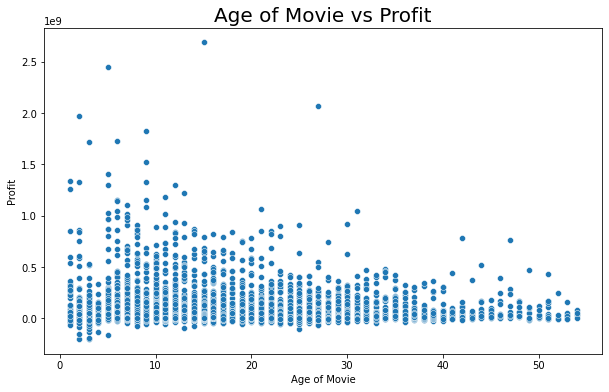

In [21]:
# plot for 'age of movie' and 'profit'
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age_of_movie", y="profit", data=imdb_data)
plt.xlabel('Age of Movie')
plt.ylabel('Profit')
plt.title('Age of Movie vs Profit', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Linear regression for IMDB dataset')

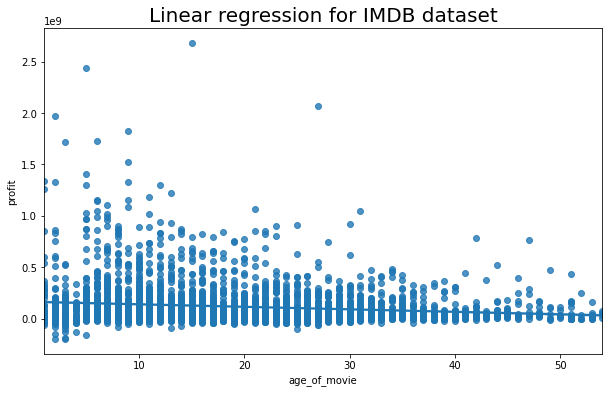

In [20]:
# with best fit line
plt.figure(figsize=(10, 6))
sns.regplot(x='age_of_movie', y='profit', data=imdb_data)
plt.title('Linear regression for IMDB dataset', fontsize = 20)

In [23]:
num_featrs_2 = ['runtimeMinutes', 'averageRating', 'budget', 'gross', 'profit', 'age_of_movie', 'director_avg_rating']

# compute correlation matrix
corr_matrix = imdb_data[num_featrs_2].corr()
corr_matrix

,runtimeMinutes,averageRating,budget,gross,profit,age_of_movie,director_avg_rating
runtimeMinutes,1.000000,0.359969,0.309109,0.250383,0.211387,-0.040322,0.366029
averageRating,0.359969,1.000000,-0.079510,0.126851,0.167496,0.193584,0.798306
budget,0.309109,-0.079510,1.000000,0.692817,0.547903,-0.303854,0.024520
gross,0.250383,0.126851,0.692817,1.000000,0.982838,-0.182198,0.112066
profit,0.211387,0.167496,0.547903,0.982838,1.000000,-0.133632,0.123732
age_of_movie,-0.040322,0.193584,-0.303854,-0.182198,-0.133632,1.000000,0.112051
director_avg_rating,0.366029,0.798306,0.024520,0.112066,0.123732,0.112051,1.000000


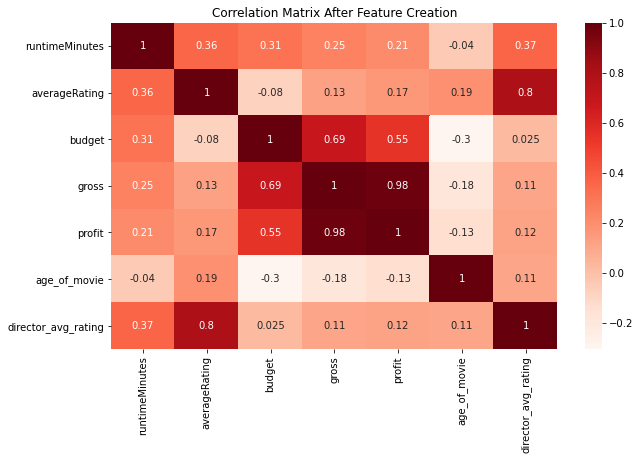

In [24]:
# plotting
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix After Feature Creation')
plt.show()

- Age of movie and profit were positively correlated with gross revenue.

## 4. Handling Categorical Features:

In [25]:
categorical_features = ['primaryTitle', 'originalTitle', 'genres', 'directors']

In [27]:
# initialize the encoders
label_encoders = {}
one_hot_encoders = {}

# apply Label Encoding
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    imdb_data[feature + '_label_encoded'] = label_encoders[feature].fit_transform(imdb_data[feature])

In [29]:
# apply One-Hot Encoding
data = pd.get_dummies(imdb_data, columns=categorical_features, drop_first=True)

print("Dataset after Encoding:\n")
print(data.head())

Dataset after Encoding:

          id  isAdult  runtimeMinutes  averageRating  numVotes    budget  \
0  tt0035423        0             118            6.4     87925  48000000   
1  tt0065421        0              78            7.1    111758   4000000   
2  tt0065938        0             144            7.6     52628   4000000   
3  tt0066026        0             116            7.4     75784   3500000   
4  tt0066206        0             172            7.9    106476  12000000   

        gross release_date  age_of_movie      profit  ...  \
0  76019048.0   2001-12-11            23  28019048.0  ...   
1  35459543.0   1970-12-11            54  31459543.0  ...   
2   5200000.0   1970-01-01            54   1200000.0  ...   
3  81600000.0   1970-01-25            54  78100000.0  ...   
4  61749765.0   1970-02-04            54  49749765.0  ...   

   directors_Xavier Gens  directors_Yarrow Cheney, Scott Mosier  \
0                      0                                      0   
1                

## 5. Polynomial Features:

### Loading the Dataset 2:

In [5]:
h_data = pd.read_csv("housing.csv")

#### About Dataset:

This dataset contains,
- RM: Average number of rooms per dwelling.
- LSTAT: Percentage of the population that is considered lower status.
- PTRATIO: Pupil-teacher ratio by town.
- MEDV: Median value of owner-occupied homes (often the target variable).

In [6]:
# checking no. of rows & columns
h_data.shape

(489, 4)

In [8]:
# about columns
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.3 KB


In [9]:
# checking for missing values
print(h_data.isna().sum())

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


##### Separate the features and the target:

In [11]:
X3 = h_data[['RM', 'LSTAT', 'PTRATIO']]
y3 = h_data['MEDV']

##### Generate Polynomial Features:

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X3)

# convert the poly. features into a DataFrame
poly_features_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(X3.columns))

poly_features_df

,RM,LSTAT,PTRATIO,RM^2,RM LSTAT,RM PTRATIO,LSTAT^2,LSTAT PTRATIO,PTRATIO^2
0,6.575,4.98,15.3,43.230625,32.74350,100.5975,24.8004,76.194,234.09
1,6.421,9.14,17.8,41.229241,58.68794,114.2938,83.5396,162.692,316.84
2,7.185,4.03,17.8,51.624225,28.95555,127.8930,16.2409,71.734,316.84
3,6.998,2.94,18.7,48.972004,20.57412,130.8626,8.6436,54.978,349.69
4,7.147,5.33,18.7,51.079609,38.09351,133.6489,28.4089,99.671,349.69
...,...,...,...,...,...,...,...,...,...
484,6.593,9.67,21.0,43.467649,63.75431,138.4530,93.5089,203.070,441.00
485,6.120,9.08,21.0,37.454400,55.56960,128.5200,82.4464,190.680,441.00
486,6.976,5.64,21.0,48.664576,39.34464,146.4960,31.8096,118.440,441.00
487,6.794,6.48,21.0,46.158436,44.02512,142.6740,41.9904,136.080,441.00


- Polynomial features of degree 2 are generated using the PolynomialFeatures class.